# EDA: Исследовательский анализ данных

Исследовательный анализ данных (EDA) - это базовый анализ новых данных, направленный на достижение следующих целей:
1. Обзор технических характеристик данных;
2. Чистка и обработка данных от пропусков, дубликатов, некорректных данных;
3. Изучение переменных;
4. Изучение статистических показателей, корреляций, распределения переменных.

### Бизнес-польза EDA:
1. Базовое понимание целостности данных, что может **подсветить проблемы** сбора данных;
2. **Отличная база** для дальнейшего анализа. В приведенном датасете дальнейшим предполагается анализ рынка недвижимости;
3. **Генерация инсайтов** для последующего изучения, проведения экспериментов и поиска выгоды.

## Загрузка и первичный осмотр датафрейма

In [38]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sqlalchemy as sql
import portfolio_db_cred as cred
import keyring
from scipy import stats

# Датасет содержит значительное количество полей. Настроим отображение всех полей. Дополнительно отредактируем экспоненциальный формат.
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

%matplotlib inline

In [39]:
# Загрузка датасета, первичный осмотр датасета
db_password = keyring.get_password('portfolio_db', cred.user)
con = sql.create_engine(f'postgresql+psycopg2://{cred.user}:{db_password}@{cred.host}:{cred.port}/postgres')
df = pd.read_sql('SELECT * FROM eda_data_houses_madrid', con)
print(f'Размер датасета: {df.shape}', end='\n\n')
print(df.info(), end='\n\n')
df.sample(5)

KeyboardInterrupt: 

#### Описание полей:
 * 0   ad_description     - описание объявления
 * 1   ad_last_update     - дата последней актуализации объявления
 * 2   air_conditioner    - наличие кондиционера
 * 3   balcony            - наличие балкона
 * 4   bath_num           - количество санузлов
 * 5   built_in_wardrobe  - наличие встроенных шкафов (гардеробные)
 * 6   chimney            - наличие камина
 * 7   condition          - техническое состояние объекта
 * 8   construct_date     - год постройки
 * 9   energetic_certif   - сертификация класса энергоэффективности
 * 10  floor              - этаж
 * 11  garage             - гараж учтен в общей площади
 * 12  garden             - наличие насаждений (сада)
 * 13  ground_size        - размер земельного участка
 * 14  heating            - тип отопления
 * 15  house_id           - ID объекта
 * 16  house_type         - тип объекта
 * 17  kitchen            - наличие кухни
 * 18  lift               - наличие лифта
 * 19  loc_city           - город нахождения объекта
 * 20  loc_district       - административный округ нахождения объекта
 * 21  loc_full           - полный адрес объекта
 * 22  loc_neigh          - район нахождения объекта
 * 23  loc_street         - улица нахождения объекта
 * 24  loc_zone           - федеральное образование нахождения объекта
 * 25  m2_real            - общая площадь объекта
 * 26  m2_useful          - полезная (жилая) площадь
 * 27  obtention_date     - дата получения объявления
 * 28  orientation        - размещение объекта относительно сторон света
 * 29  price              - цена объекта, евро
 * 30  reduced_mobility   - наличие условий для людей со сниженной мобильностью
 * 31  room_num           - количество комнат, в т.ч. студии
 * 32  storage_room       - наличие кладовой комнаты
 * 33  swimming_pool      - наличие бассейна
 * 34  terrace            - наличие террасы
 * 35  unfurnished        - объект не мебелирован

## Подготовка датафрейма: корректировка типов данных, обработка пропусков, дубликатов

In [ ]:
# Проверяем пропуски в % от общего числа строк

df.isna().mean().sort_values(ascending=False)

unfurnished         1.00
kitchen             1.00
ground_size         1.00
garage              0.65
construct_date      0.57
m2_useful           0.57
orientation         0.54
heating             0.46
loc_street          0.26
energetic_certif    0.24
lift                0.07
condition           0.05
floor               0.02
loc_neigh           0.02
ad_description      0.01
house_id            0.00
balcony             0.00
terrace             0.00
swimming_pool       0.00
storage_room        0.00
room_num            0.00
reduced_mobility    0.00
price               0.00
air_conditioner     0.00
obtention_date      0.00
m2_real             0.00
house_type          0.00
loc_zone            0.00
garden              0.00
chimney             0.00
loc_full            0.00
loc_district        0.00
loc_city            0.00
ad_last_update      0.00
built_in_wardrobe   0.00
bath_num            0.00
dtype: float64

**Наличие пропусков**  
Необходимо обратить внимание на наличие пропущенных значений.   
Поля unfurnished, kitchen, ground_size - практически пустые. В отношении них следует ознакомиться с непустыми значениями и принять решение о целесообразоности присутствия данных полей в датасете.  
Поля garage, construct_date, m2_useful, orientation, heating, loc_street, energetic_certif - имеют значительное количество пустых значений. Следует проанализоровать непустые значения в данных строках и принять решение о работе с пропущенными значениями.  
Поля lift, loc_neigh, ad_description - имеют незначательное количество пустых значений. Следует проанализоровать непустые значения в данных строках и принять решение о работе с пропущенными значениями.  
Остальные поля не имеют пропущенных значений.


In [ ]:
# Проверяем дубликаты
df[df.duplicated()].shape

(6, 36)

Обнаружены дубликаты записей, следует проверить и очистить.

In [ ]:
df[df.duplicated(keep=False)]

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
290,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
1052,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
1408,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
2058,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
3448,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
4539,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
5063,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,garden,ground_size,heating,house_id,house_type,kitchen,lift,loc_city,loc_district,loc_full,loc_neigh,loc_street,loc_zone,m2_real,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished


Выявлены явно ошибочные данные

In [ ]:
# Удаляем дубликаты через удаление строк, т.к. нам нужно удалить и оригинальную строку. (данные явно ошибочные)
df.drop(df[df.duplicated(keep=False)].index, inplace=True)

### Преобразуем типы данных  
В случайной выборке датасета обнаружены поля с значениями 1/0. Проверим все категориальные переменные в целях дальнейшего преобразования в Булево значение.

In [ ]:
# Оценим количество значений категориальных переменных
print('Уникальных значений:')
for i in df.columns:
    print(f"{i}: {len(df[i].unique())}")
    print('------------------------------')

Уникальных значений:
ad_description: 4818
------------------------------
ad_last_update: 213
------------------------------
air_conditioner: 2
------------------------------
balcony: 2
------------------------------
bath_num: 10
------------------------------
built_in_wardrobe: 2
------------------------------
chimney: 1
------------------------------
condition: 4
------------------------------
construct_date: 114
------------------------------
energetic_certif: 4
------------------------------
floor: 52
------------------------------
garage: 39
------------------------------
garden: 2
------------------------------
ground_size: 1
------------------------------
heating: 12
------------------------------
house_id: 5248
------------------------------
house_type: 9
------------------------------
kitchen: 1
------------------------------
lift: 3
------------------------------
loc_city: 2
------------------------------
loc_district: 11
------------------------------
loc_full: 3026
---------

In [ ]:
# Ознакомимся с значениями в тех полях, в которых количество уникальных значений не более 20.

for i in df.columns:
    if len(df[i].unique()) <= 20:
        print(df[i].value_counts(dropna=False))
        print('------------------')
    else:
        continue

air_conditioner
0    2627
1    2621
Name: count, dtype: int64
------------------
balcony
0    4571
1     677
Name: count, dtype: int64
------------------
bath_num
1            2571
2            1813
3             565
4             205
5              72
6              10
sin baños       6
7               4
13              1
10              1
Name: count, dtype: int64
------------------
built_in_wardrobe
1    3064
0    2184
Name: count, dtype: int64
------------------
chimney
0    5248
Name: count, dtype: int64
------------------
condition
segunda mano/buen estado      3755
segunda mano/para reformar     873
promoción de obra nueva        368
None                           252
Name: count, dtype: int64
------------------
energetic_certif
en trámite         2918
None               1265
no indicado        1046
inmueble exento      19
Name: count, dtype: int64
------------------
garden
0    4056
1    1192
Name: count, dtype: int64
------------------
ground_size
None    5248
Name: count, dty

In [ ]:
# После удаления дубликатов и ознакомления с уникальными значениями, выявлены некорректные поля
# Удалим полностью пустые и иные не информативные поля
# unfurnished, kitchen, ground_size - полностью пустые
# chimney - ни одного объекта с камином
# obtention_date - дата получения данных, в каждой строке одинаковое значение. По сути - метаданные, в датасете пока не нужны.

failed_columns = ['unfurnished', 'kitchen', 'ground_size', 'chimney', 'obtention_date']

df.drop(failed_columns, axis=1, inplace=True)

In [ ]:
# Выявлены лишние пробелы в начале значений в поле house_type
df['house_type'] = df['house_type'].str.strip()

In [ ]:
# Преобразуем поля со значениями 1/0 в Булевый тип

# Для удобства сохраним в переменную список полей
columns_for_bool = ['air_conditioner', 'balcony', 'built_in_wardrobe', 'garden', 'lift', 
    'reduced_mobility', 'storage_room', 'swimming_pool', 'terrace']

# Первым шагом преобразуем в числовой тип, т.к. строка "0" - непустое значение, а значит True (нам нужен False)
df[columns_for_bool] = df[columns_for_bool].apply(pd.to_numeric, errors='coerce', axis=1)
df[columns_for_bool] = df[columns_for_bool].map(lambda x: bool(x) if pd.notnull(x) else np.nan)

In [ ]:
# Проверим

print(df['lift'].value_counts(dropna=False))

lift
True     3404
False    1462
NaN       382
Name: count, dtype: int64


--------------
Выявлены поля: floor, garage, room_num. Указанные поля содержат строковые значения, но, судя по датасету, следует извлечь цифры и преобразовать поля в соответствующий тип данных. 


In [ ]:
# Ознакомимся с значениями

for i in df[['floor', 'garage', 'room_num']].columns:
    print(df[i].value_counts(dropna=False))
    print('---------------------------------')


floor
planta 1ª exterior      872
planta 2ª exterior      866
planta 3ª exterior      709
planta 4ª exterior      491
bajo exterior           433
planta 5ª exterior      308
planta 6ª exterior      189
None                    120
exterior                115
planta 7ª exterior      105
planta 1ª interior       89
4 plantas                88
bajo interior            86
3 plantas                71
planta 2ª interior       66
planta 8ª exterior       66
entreplanta exterior     59
planta 1ª                56
planta 3ª interior       51
2 plantas                44
planta 3ª                44
planta 4ª interior       39
bajo                     36
planta 2ª                36
planta 9ª exterior       34
planta 5ª interior       26
planta 4ª                21
planta 11ª exterior      19
planta 10ª exterior      19
planta 5ª                15
1 planta                 11
planta 6ª interior        8
planta 7ª interior        8
semi-sótano interior      6
entreplanta interior      5
sótano interio

Таким образом, для извлечения числовых значений были приняты следующие условия:
1. Floor - этажность. Если возможно, извлекаем номер этажа. Подвалам, полуподвалам присваиваем -1. Для "первых" этажей с пометкой "bajo" (как правило, первый этаж нежилой). Значения без указания этажа, даже примерного - заменяем на пропуски. Для отдельных строений число будет означать этажность, а не этаж.
2. Garage - стоимость гаража/машиноместа. Если возможно, извлекаем стоимость. Где указано, что входит в стоимость - заменяем на 0, что означает, что гараж присутствует, но входит в стоимость.
3. Room_num - количество комнат. Заменим sin habitación на 1 для студий. Для других типов помещений добавим пропуски.
4. Bath_num - количество санузлов. Объектам "без санузлов" назначим 0

In [ ]:
# Обработаем значения в поле floor

def get_floor_num(value):
    if 'bajo' in str(value):
        return '1' # корректировка на испанский подсчет этажей
    elif 'sótano' in str(value):
        return '-1'
    else:
        temp = re.findall(r'\d+', str(value))
        if len(temp) > 0:
            return int(temp[0])
        else:
            return np.nan
            
df['floor'] = df['floor'].apply(get_floor_num)

In [ ]:
# Обработаем значения в поле garage

def get_garage_price(value):
    if value == 'plaza de garaje incluida en el precio':
        return 0
    else:
        temp = re.findall(r'\d', str(value))
        if len(temp) > 0:
            return ''.join(temp)
        else:
            return np.nan

df['garage'] = df['garage'].apply(get_garage_price)

In [ ]:
# Обработаем значения в поле bath_num

df['bath_num'] = df['bath_num'].replace('sin baños', 0)

In [ ]:
# Обработаем значения в поле room_num

df.loc[(df['room_num'] == 'sin habitación') & (df['house_type'] == 'Estudio'), 'room_num'] = 1
df.loc[(df['room_num'] == 'sin habitación') & (df['house_type'] != 'Estudio'), 'room_num'] = np.nan

In [ ]:
# Преобразуем тип данных

numeric_columns = ['m2_real', 'm2_useful', 'price', 'floor', 'garage', 'room_num', 'bath_num']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [ ]:
# Добавим поле с расчетом цены квадратного метра (реальной площади) в целях дальнейшего анализа

df['price_per_m2'] = round(df['price'] / df['m2_real'], 2)

numeric_columns = ['m2_real', 'm2_useful', 'price', 'floor', 'garage', 'room_num', 'bath_num', 'price_per_m2']

## Ознакомимся с описательной статистикой, выявим аномалии и выбросы.
## Произведем первичное ознакомление с распределением непрерывных переменных.

In [ ]:
# Посмотрим базовую описательную статистику

df.describe()

,bath_num,floor,garage,m2_real,m2_useful,price,room_num,price_per_m2
count,5248.00,4943.00,1822.00,5248.00,2274.00,5248.00,5230.00,5248.00
mean,1.75,2.83,2765.17,119.80,96.90,474522.77,2.75,3559.67
std,0.95,2.13,21340.48,174.94,198.62,670215.23,1.20,2255.99
min,0.00,-1.00,0.00,10.00,18.00,39000.00,1.00,219.12
25%,1.00,1.00,0.00,66.00,56.25,159375.00,2.00,2057.83
50%,2.00,2.00,0.00,90.00,74.00,247000.00,3.00,2842.86
75%,2.00,4.00,0.00,127.00,95.00,440000.00,3.00,4125.00
max,13.00,60.00,825000.00,8510.00,7000.00,9488250.00,15.00,27000.00


In [ ]:
# Ознакомимся с модой и медианой указанных полей
numeric_aver = {}

for i in numeric_columns:
    # игнорируем пропуски
    numeric_aver[i] = [round(np.mean(df[i]), 2), np.nanmedian(df[i]), stats.mode(df[i], nan_policy='omit')[0]]

numeric_aver_df = pd.DataFrame(numeric_aver, index=['mean', 'median', 'mode'])

In [ ]:
numeric_aver_df

,m2_real,m2_useful,price,floor,garage,room_num,bath_num,price_per_m2
mean,119.80,96.90,474522.77,2.83,2765.17,2.75,1.75,3559.67
median,90.00,74.00,247000.00,2.00,0.00,3.00,2.00,2842.86
mode,70.00,70.00,260000.00,1.00,0.00,3.00,1.00,2000.00


Визуализируем статистические данные с помощью скрипичных диаграмм (Violinplot).

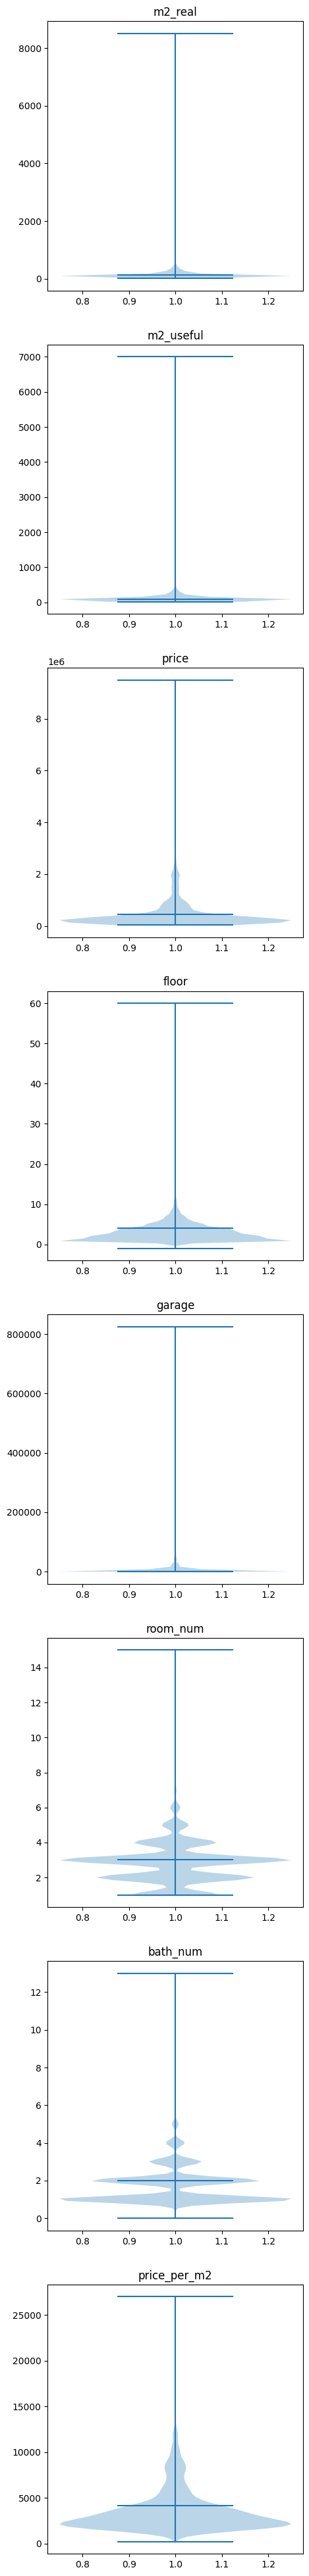

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(5, 50)) 

for i in range(8):
    axes[i].violinplot(df[numeric_columns[i]].dropna(), quantiles=[0.75])
    axes[i].set_title(numeric_columns[i])

### Выбросы  
Как видно из представленных диаграмм и таблиц, исследуемые числовые ряды имеют значительные выбросы.  
Рекомендуется выявить причины возникновения выбросов: ошибки в сборе данных, человеческий фактов (умышленной или по ошибке продавец вводит в объявлении некорректные данные). По результатам исследований причин возникновения выбросов, следует выработать политику их обработки: удаление, замена на среднее (медиану, моду) значение, корректировка причин появления выбросов и т.д.  

Очистим исследуемые поля от выбросов с применением межквартильного интервала. Для этого создадим объект DataFrame, который будет использоваться в дальнейшем при изучении распределения и корреляций.

In [ ]:
df_num = df[numeric_columns].copy()

q1 = df_num.quantile(q=.25)
q3 = df_num.quantile(q=.75)
iqr = df_num.apply(stats.iqr)

data_clean = df_num[~((df_num < (q1-1.5*iqr)) | (df_num > (q3+1.5*iqr))).any(axis=1)]


In [ ]:
data_clean

,m2_real,m2_useful,price,floor,garage,room_num,bath_num,price_per_m2
0,103,96.00,164900,4.00,0.00,3.00,1,1600.97
1,120,NaN,370000,2.00,0.00,4.00,2,3083.33
2,99,NaN,190000,2.00,0.00,3.00,2,1919.19
4,169,100.00,282000,3.00,0.00,4.00,2,1668.64
5,84,NaN,190000,1.00,0.00,2.00,2,2261.90
...,...,...,...,...,...,...,...,...
5248,125,100.00,610000,4.00,NaN,3.00,2,4880.00
5249,46,38.00,290000,4.00,NaN,1.00,1,6304.35
5250,115,100.00,715000,3.00,NaN,3.00,3,6217.39
5252,155,NaN,760000,5.00,NaN,3.00,3,4903.23


Повторно визуализируем данные, очищенные от выбросов.

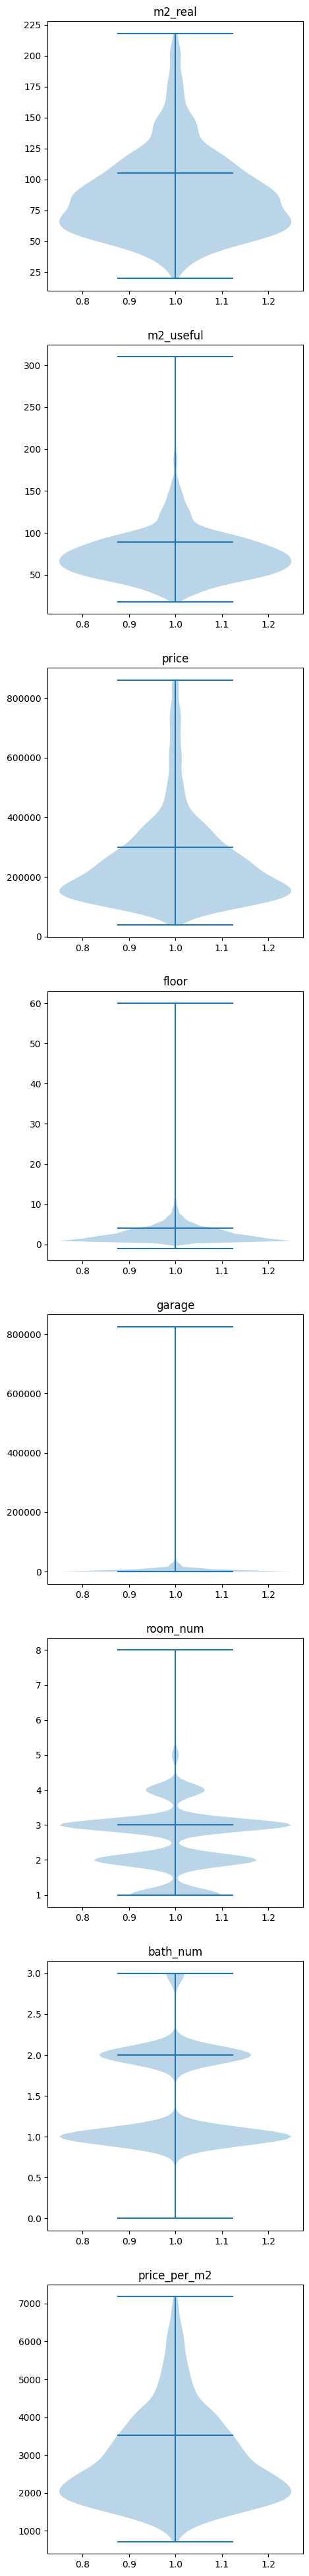

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(5, 50)) 

for i in range(8):
    axes[i].violinplot(data_clean[numeric_columns[i]].dropna(), quantiles=[0.75])
    axes[i].set_title(numeric_columns[i])

Распределения стали более наглядны, кроме garage (стоимость гаража). Ранее мы выявили моду и медиану данного поля = 0. Следовательно, в датафрейме преобладают объекты вообще без гаража (квартиры, студии и т.д.), поэтому не указана стоимость гаража.

Дополнительно оценим распределение на гистограммах.

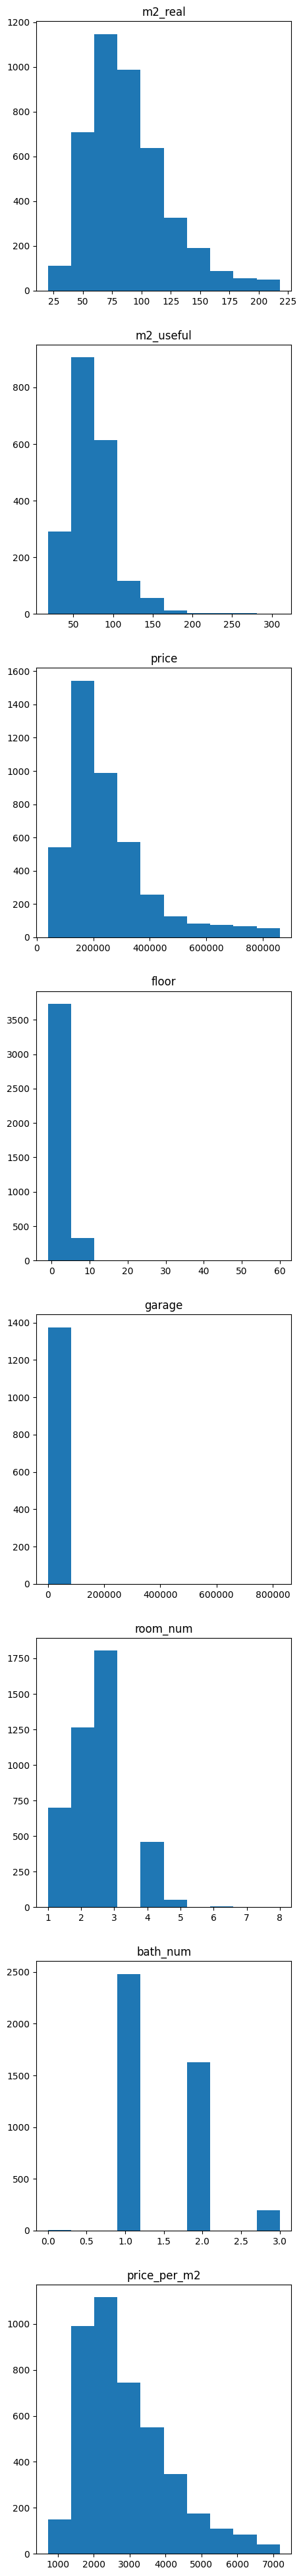

In [ ]:
# оценим распределение на гистограммах
fig, axes = plt.subplots(8, 1, figsize=(5, 50)) 

for i in range(8):
    axes[i].hist(data_clean[numeric_columns[i]].dropna())
    axes[i].set_title(numeric_columns[i])

## Идентифицируем связи и корреляции между непрерывными переменными.

### Цели
Первичное выявление связей и корреляций должно послужить отправной точкой для поиска инсайтов и последующей генерации гипотез. С точки зрения изучения рынка недвижимости, крайне важна стоимость квадратного метра и ее корреляция с другими показателями, а также представление в срезе различных категорий (анализ произведен в соответствующем разделе)

Сравним корреляции двух датафреймов: с выбросами и без выбросов

<Axes: >

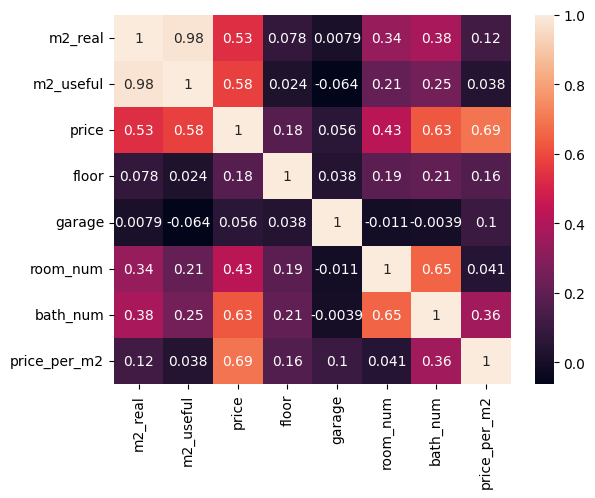

In [ ]:
sns.heatmap(df[numeric_columns].corr(), annot=True)

<Axes: >

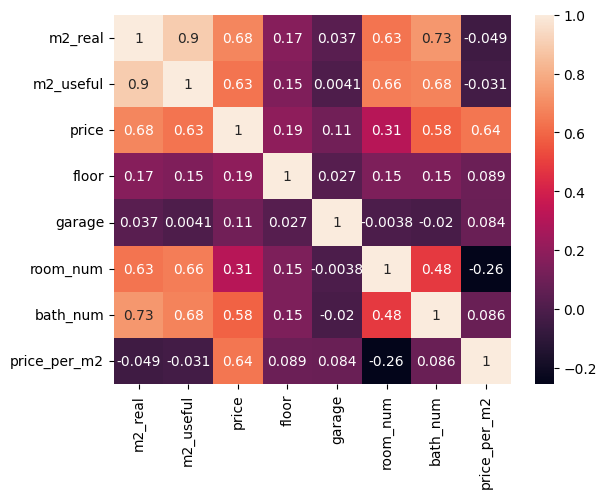

In [ ]:
sns.heatmap(data_clean.corr(), annot=True)

Исследование корреляции на датафрейме, очищенном от выбросов, более наглядно. Цифра и цвет демонстрируют направление и силу корреляции от -1 до 1.

**Польза:** исследование корреляций может сгенерировать различные инсайты для дальнейшего углубленного корреляционного анализа и поиска пользы для бизнеса. Рассмотрим некоторые примеры.

<Axes: xlabel='price_per_m2', ylabel='room_num'>

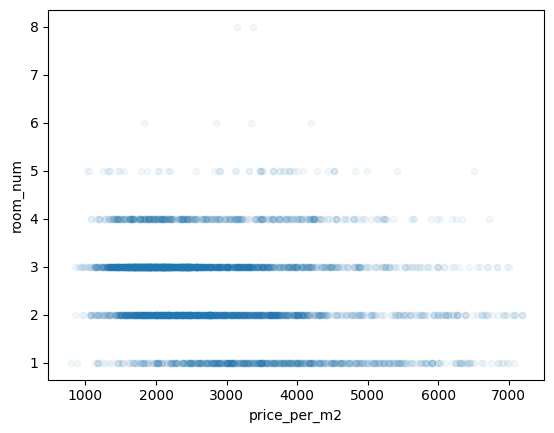

In [ ]:
# Проверим некоторые корреляции на диаграмме рассеивания. Придется вручную корректировать параметр alpha, чтобы увидеть нисходящий тренд

data_clean.plot(x='price_per_m2', y='room_num', kind='scatter', alpha=0.05)

**Вывод**: Чем больше комнат в объекте, тем ниже цена одного квадратного метра объекта. Данный вывод подтверждается на многих рынках недвижимости

<Axes: xlabel='m2_real', ylabel='bath_num'>

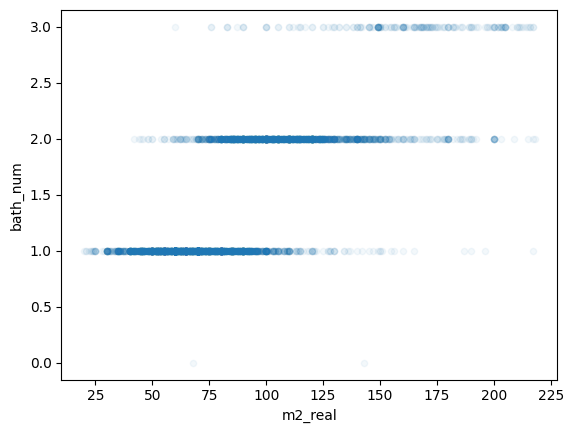

In [ ]:
# Пример очевидных корреляций: чем больше общая площадь, тем больше количество санузлов.

data_clean.plot(x='m2_real', y='bath_num', kind='scatter', alpha=0.05)

<Axes: xlabel='m2_real', ylabel='room_num'>

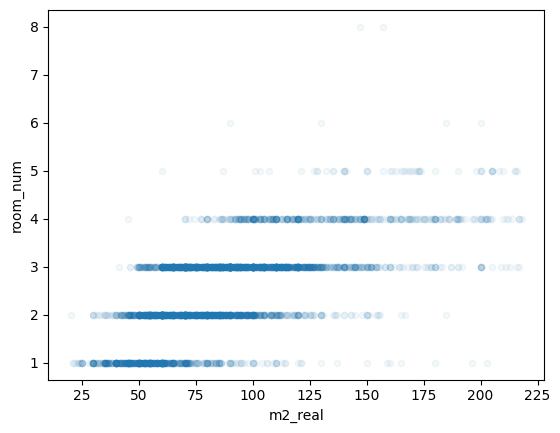

In [ ]:
# Пример очевидных корреляций: чем больше общая площадь, тем больше количество комнат.

data_clean.plot(x='m2_real', y='room_num', kind='scatter', alpha=0.05)

Однако данные выводы не стоит принимать как единственно верные и следует проводить дальнейший анализ и проверку выводов (например, с помощью сводных таблиц и иных визуализаций)

## Произведем анализ категориальных переменных

**Цели**  
Анализ категориальных переменных производится с целью получения базового представления о распределении сущностей по категориям. Кроме того, возможно предварительно оценить распределение некоторых непрерывных переменных.  

**Бизнес-польза** с учетом представленного датафрейма: первичное ознакомление с рынком недвижимости, оценка емкости рынка, распределения по объектам и иная полезная информация. Указанный анализ может служить отправной точкой для разработки дашборда.

Классическое исследование категориальных переменных - построение сводных таблиц. В качестве ключевых метрик возьмем:  
1. Количество строк, что продемонстрирует количество объявлений;
2. Сумма реальной площади продаваемых объектов;
3. Средняя площадь продаваемых объектов;
4. Средняя цена одного квадратного метра;

Данные показатели послужат отличной отправной точкой в дальнейшем анализе рынка.

**Ознакомимся с емкостью рынка** по категориям. Оценим количество объектов и сумму площадей в квадратных метрах.

In [ ]:
# Определим, в разрезе каких категориальных переменных было бы целесообразно изучить датафрейм
df_categ = ['condition', 'floor', 'house_type', 'loc_district', 'room_num']

# Да расчета количества объявлений и суммы продаваемой площади объектов недвижимости, датафрейм не очищаем от выбросов.
for i in df_categ:
    print(df.groupby(i, dropna=False)['m2_real'].agg(['count', 'sum']))
    print('---------------------------------------')

                            count     sum
condition                                
promoción de obra nueva       368   41912
segunda mano/buen estado     3755  430337
segunda mano/para reformar    873  126158
NaN                           252   30311
---------------------------------------
       count     sum
floor               
-1.00     16    1120
1.00    1583  161128
2.00    1013  112500
3.00     875  105190
4.00     639   84976
5.00     351   49470
6.00     202   31486
7.00     114   15605
8.00      67   10923
9.00      35    3514
10.00     21    2861
11.00     19    2607
12.00      4     426
13.00      1      63
17.00      2     407
60.00      1      96
NaN      305   46346
---------------------------------------
                             count     sum
house_type                                
Casa o chalet                   27    7517
Casa o chalet independiente     37   14530
Chalet adosado                 160   32386
Chalet pareado                  50   14559
Dúplex     

In [ ]:
# Да расчета средней площади объекта и средней цены 1 квадратного метра, необходимо очистить данные от выбросов.

for i in df_categ:
    df_temp1 = df[[i, 'm2_real', 'price_per_m2']].copy()
    q1 = df_temp1[['m2_real', 'price_per_m2']].quantile(q=.25)
    q3 = df_temp1[['m2_real', 'price_per_m2']].quantile(q=.75)
    iqr = df_temp1[['m2_real', 'price_per_m2']].apply(stats.iqr)
    df_temp_cl = df_temp1[~((df_temp1[['m2_real', 'price_per_m2']] < (q1-1.5*iqr)) 
                            | (df_temp1[['m2_real', 'price_per_m2']] > (q3+1.5*iqr))).any(axis=1)]
    print(df_temp_cl.groupby(df_temp_cl[i], dropna=False).agg(m2_mean = ('m2_real', 'mean'), price_m2_mean = ('price_per_m2', 'mean')))
    print('---------------------------------------------')

                            m2_mean  price_m2_mean
condition                                         
promoción de obra nueva      108.92        2831.05
segunda mano/buen estado      87.51        2975.87
segunda mano/para reformar    93.72        2938.95
NaN                           83.54        2582.14
---------------------------------------------
       m2_mean  price_m2_mean
floor                        
-1.00    71.87        3504.65
1.00     83.56        2855.17
2.00     87.60        2903.81
3.00     88.25        2813.64
4.00     93.50        2956.41
5.00     99.47        3343.00
6.00    110.95        3330.10
7.00    116.92        3278.54
8.00    118.29        3524.14
9.00     87.67        3320.91
10.00   122.81        4096.98
11.00   109.80        3407.74
12.00   106.50        4133.42
13.00    63.00        5396.83
17.00   203.50        6408.67
60.00    96.00        1875.00
NaN      94.41        2776.77
---------------------------------------------
                             m2_

Дополнительно произведем анализ для непрерывных переменных путем дискретизации. Оценим среднюю цену 1 квадратного метра по категориям площади. Категории определены в следующем порядке:  
1. Площадь и цена 1 квадратного метра очищены от выбросов;
2. Определены 10 категорий площади по величине площади.

In [ ]:
# для qcut: m2real, price. Проведем дискретизацию. Для этого чистим от выбросов, так как в площади и цене есть выбросы

df_temp1 = df[['m2_real', 'price_per_m2']].copy()
q1 = df_temp1[['m2_real', 'price_per_m2']].quantile(q=.25)
q3 = df_temp1[['m2_real', 'price_per_m2']].quantile(q=.75)
iqr = df_temp1[['m2_real', 'price_per_m2']].apply(stats.iqr)
df_temp_cl = df_temp1[~((df_temp1[['m2_real', 'price_per_m2']] < (q1-1.5*iqr)) 
                        | (df_temp1[['m2_real', 'price_per_m2']] > (q3+1.5*iqr))).any(axis=1)]

df_temp_cl.loc[:, 'category'] = pd.cut(df_temp_cl['m2_real'], 10)
df_temp_cl.groupby('category', observed=False).agg(price_m2 = ('price_per_m2', 'mean'), count = ('price_per_m2', 'count'))

C:\Users\user\AppData\Local\Temp\ipykernel_7540\1146475967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_cl.loc[:, 'category'] = pd.cut(df_temp_cl['m2_real'], 10)


,price_m2,count
category,,
"(19.802, 39.8]",4213.71,111
"(39.8, 59.6]",3252.85,709
"(59.6, 79.4]",2616.72,1147
"(79.4, 99.2]",2752.33,989
"(99.2, 119.0]",2756.38,659
"(119.0, 138.8]",2938.88,310
"(138.8, 158.6]",3462.75,215
"(158.6, 178.4]",3509.62,101
"(178.4, 198.2]",3891.83,82


Дальнейшим развитием представленного базового анализа, может являться анализ рынка, более глубокий статистический анализ, с целью **выявления перспективных ниш рынка для реализации бизнес-идей.**


# Выводы

В результата произведения данного исследовательского анализа данных, можно сформировать следующие **бизнес-выводы**:
1. Получена информация об особенностях сбора данных, поставлены задачи на корректировку поведения пользователей при заполнении данных в объявлении. Более корректные данные в объявлении помогут исключить заблуждение покупателей объектов и **повысит рейтинг доверия к сайту**. Дополнительная выгода: получение более точных данных.
2. Произведен базовый анализ рынка, что позволит быстрее и точнее разработать дашборд с целью изучение ниш и сегментов. Оценив рынок, мы можем разработать **маркетинговые стратегии и новые фичи на сайте**, направленные на конкретных пользователей.
3. Изучение непрерывных переменных и их корреляции даст нам **понимание целевой аудитории и рынка**. Полученные данные необходимо соотнести с данными маркетинговой аналитики и разработать стратегии продвижения. Например, мы можем сделать выводы по устройствам входа на сайт, регионам, и соотнести указанные данные с полученными в текущем анализе: стоимость объектов, площади и т.д.

Проведение EDA необходимо производить для всех новых данных, а так же систематически повторять с целью контроля датасета.